# Regression Case Study

Di sini kita akan menggunakan data [fish market](https://www.kaggle.com/datasets/aungpyaeap/fish-market).

Tugas yang akan kita kerjakan adalah membuat model yang dapat memprediksi berat ikan berdasarkan data panjang, lebar, dan tinggi ikan tersebut.

Keterangan kolom data:
1. Species: Species name of fish
2. Weight: Weight of fish (gram)
3. Length1: Vertical length (cm)
4. Length2: Diagonal length (cm)
5. Length3: Cross length (cm)
6. Height: Height (cm)
7. Width: Diagonal width (cm)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.size'] = 16

## Exploratory Data Analysis

### Load Data

In [2]:
link_file = 'https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/05.%20Basic%20Machine%20Learning/use%20case%20ML/Fish.csv'

fish_df = pd.read_csv(link_file)
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Descriptive Statistics

In [4]:
fish_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


### Korelasi

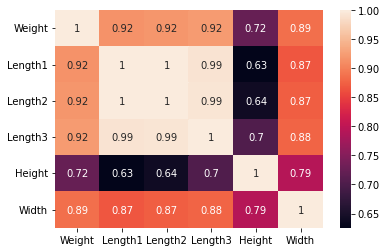

In [5]:
sns.heatmap(fish_df.corr(), annot=True)
plt.show()

### Hubungan Antar Data

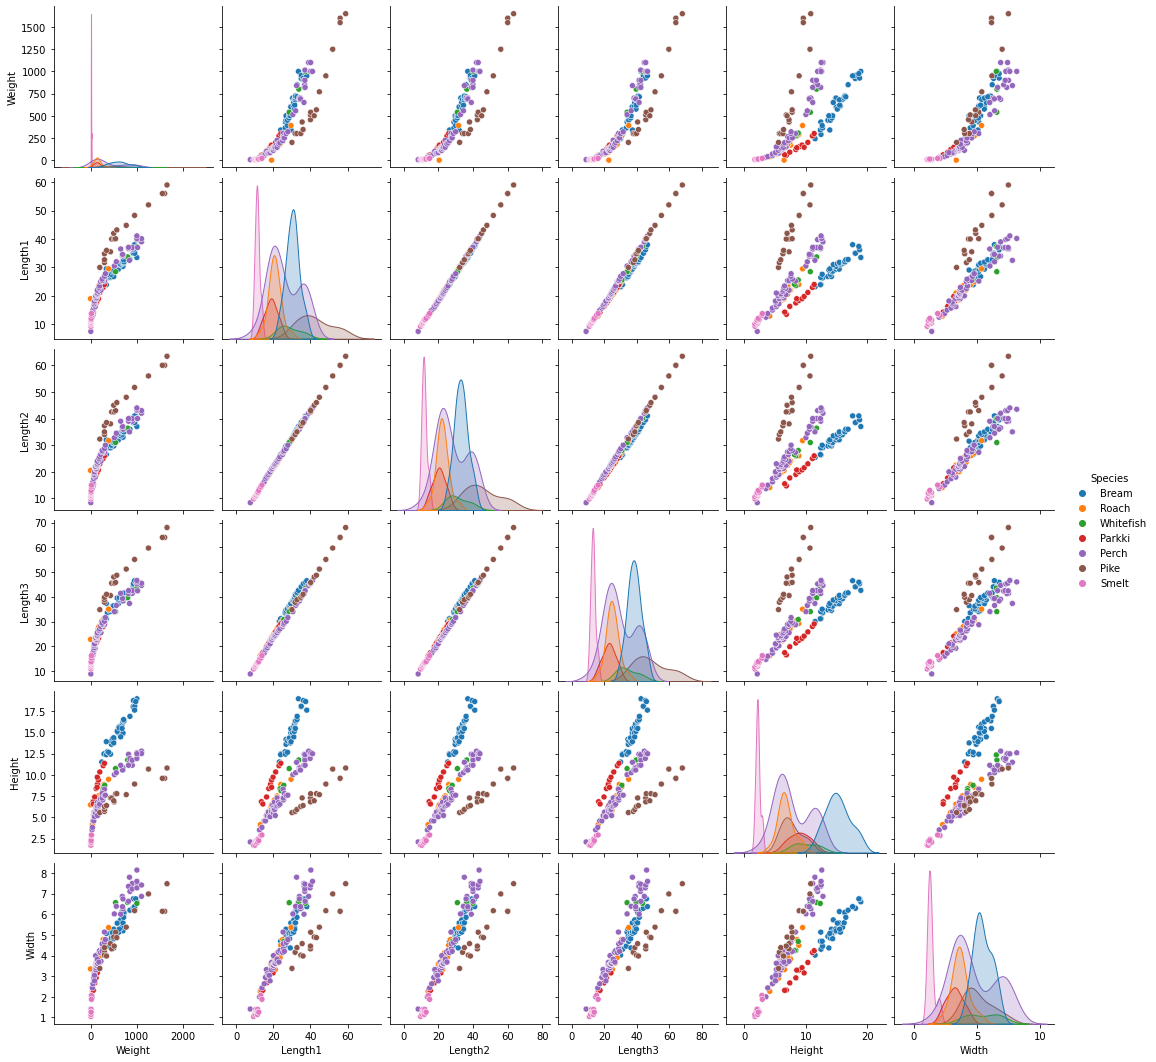

In [6]:
sns.pairplot(fish_df, kind='scatter', hue='Species')
plt.show()

### Outliers

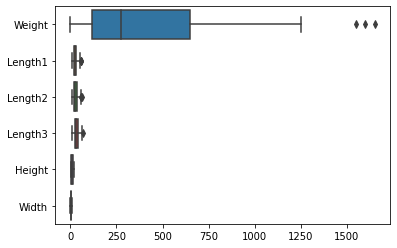

In [7]:
sns.boxplot(data=fish_df, orient='h')
plt.show()

## Data Preparation

Karena datanya tidak terlalu rumit, demi kesederhanaan, untuk features tidak menggunakan column species.

In [8]:
target = fish_df['Weight']
features = fish_df.copy()
features.drop(columns=['Species', 'Weight'], inplace=True)

<div class="alert alert-block alert-warning">
Bagaimana bila kita menggunakan kolom berbeda sebagai features? Bagaimana memilih kolom yang akan digunakan sebagai features?
</div>

In [9]:
features.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [10]:
target

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

## Membuat Model

### Linear Regression

In [11]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

cv = KFold(n_splits=10, shuffle=True, random_state=100)
linreg = LinearRegression()
linreg_scores = cross_val_score(X=features, y=target, estimator=linreg, cv=cv, scoring='r2')
linreg_scores

array([0.90343312, 0.89163833, 0.72442879, 0.94114075, 0.80889789,
       0.66361701, 0.85954042, 0.83384219, 0.65554458, 0.87644998])

### Model Pembanding

<div class="alert alert-block alert-warning">
Buatlah model pembanding, kemudian bandingkan performa model tersebut dengan model di atas.
</div>

## Membandingkan Performa Model

Kita akan membandingkan performa 2 model dengan menggunakan hypothesis testing.

$H_0$: Tidak ada perbedaan performa antara kedua model<br>
$H_A$: Terdapat perbedaan performa antara kedual model

In [12]:
from scipy import stats

# Jangan lupa ganti variabel kedua dengan scores dari model yang anda buat
_, p_value = stats.ttest_ind(linreg_scores, linreg_scores)
p_value

1.0

## Kesimpulan

<div class="alert alert-block alert-warning">
Tuliskan kesimpulan anda atas hasil perbandingan model tersebut.
</div>